# **Ejercicio 3: Predicción de consumo excesivo de agua en manzanas de la CDMX**

Descripción:
De acuerdo con los datos públicos de consumo de agua en la Ciudad de México, predece si
una manzana (unidad geográfica censal) presentará un consumo excesivo de agua en un
próximo periodo bimestral.

# ***1. Carga y Exploración General de los Datos***

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV



In [21]:
# Cargar los datos
df = pd.read_csv('consumo_agua_historico_2019.csv')

# Exploración inicial
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71102 entries, 0 to 71101
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha_referencia      71102 non-null  object 
 1   anio                  71102 non-null  int64  
 2   bimestre              71102 non-null  int64  
 3   consumo_total_mixto   62775 non-null  float64
 4   consumo_prom_dom      66282 non-null  float64
 5   consumo_total_dom     66282 non-null  float64
 6   consumo_prom_mixto    62775 non-null  float64
 7   consumo_total         71102 non-null  float64
 8   consumo_prom          71102 non-null  float64
 9   consumo_prom_no_dom   71102 non-null  float64
 10  consumo_total_no_dom  71102 non-null  float64
 11  indice_des            71102 non-null  object 
 12  colonia               70886 non-null  object 
 13  alcaldia              70886 non-null  object 
 14  latitud               71102 non-null  float64
 15  longitud           

# ***2. Limpieza Básica de Datos***

In [22]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos en columnas clave
df.dropna(subset=['consumo_total', 'indice_des'], inplace=True)

# Eliminar columnas no relevantes
df.drop(['fecha_referencia', 'latitud', 'longitud'], axis=1, inplace=True)

# Verificar y eliminar duplicados
print(f"Duplicados antes: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicados después: {df.duplicated().sum()}")

fecha_referencia           0
anio                       0
bimestre                   0
consumo_total_mixto     8327
consumo_prom_dom        4820
consumo_total_dom       4820
consumo_prom_mixto      8327
consumo_total              0
consumo_prom               0
consumo_prom_no_dom        0
consumo_total_no_dom       0
indice_des                 0
colonia                  216
alcaldia                 216
latitud                    0
longitud                   0
dtype: int64
Duplicados antes: 2495
Duplicados después: 0


# ***3. Análisis Exploratorio y Visualización***

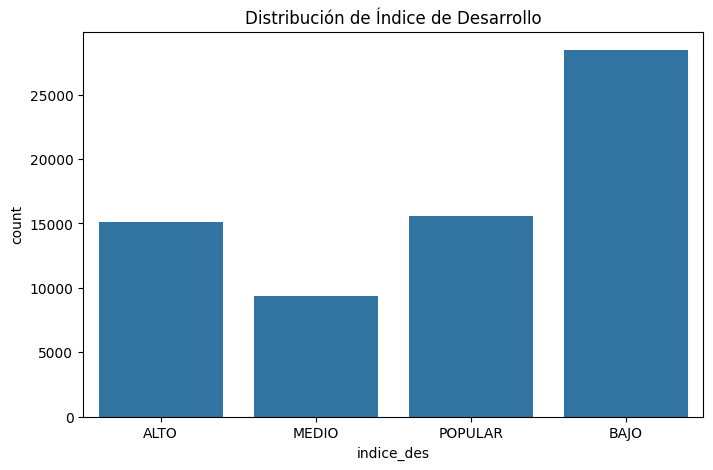

In [23]:
# Distribución del índice de desarrollo (nuestra variable objetivo)
plt.figure(figsize=(8,5))
sns.countplot(x='indice_des', data=df)
plt.title('Distribución de Índice de Desarrollo')
plt.show()

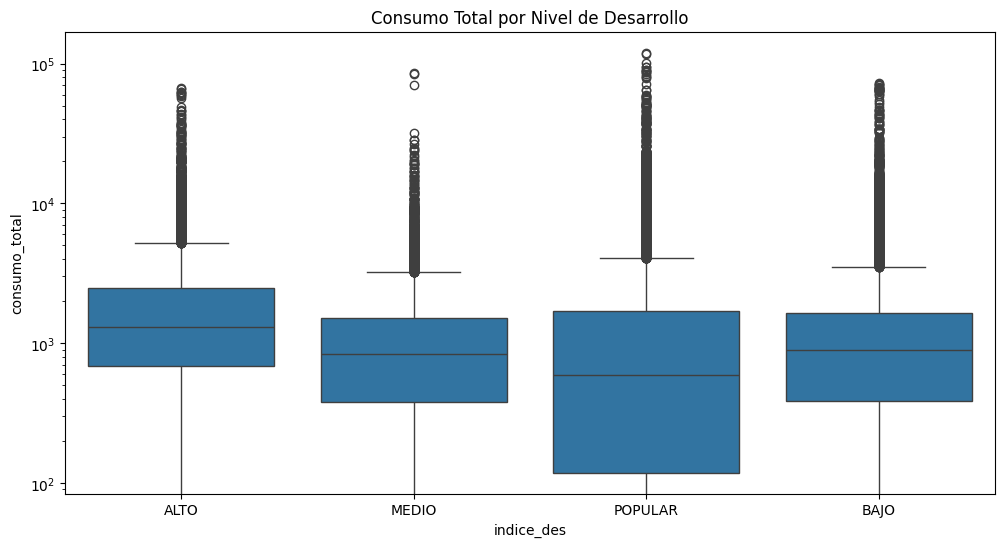

In [24]:
# Relación entre consumo total y tipo de colonia
plt.figure(figsize=(12,6))
sns.boxplot(x='indice_des', y='consumo_total', data=df)
plt.yscale('log')  # Usamos escala logarítmica por la gran variación
plt.title('Consumo Total por Nivel de Desarrollo')
plt.show()

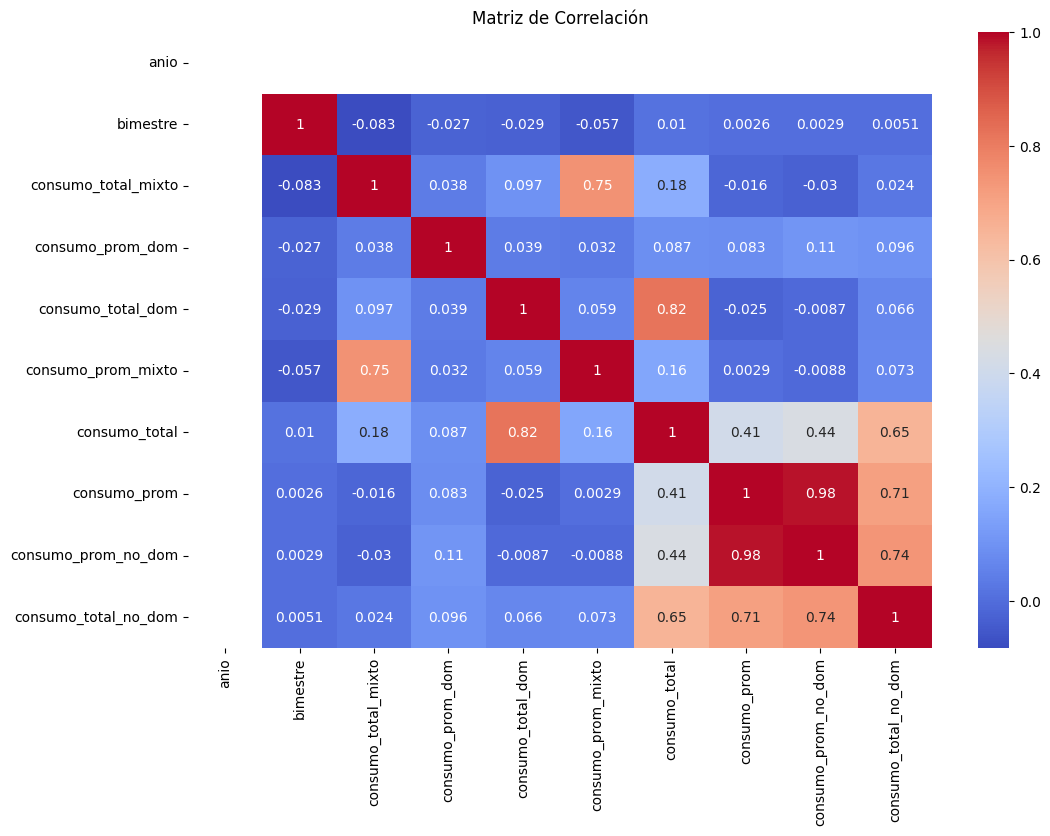

In [25]:
# Correlación entre variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# ***4. Preprocesamiento Técnico***

In [26]:
# Definir variable objetivo: consideraremos "ALTO" como consumo excesivo
df['consumo_excesivo'] = df['indice_des'].apply(lambda x: 1 if x == 'ALTO' else 0)

# Codificación de variables categóricas
cat_cols = ['alcaldia', 'colonia']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Selección de características
features = ['anio', 'bimestre', 'consumo_total', 'consumo_prom', 'alcaldia', 'colonia']
X = df[features]
y = df['consumo_excesivo']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***5. Entrenamiento del Modelo***

In [28]:
# Modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Modelo de Regresión Logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# ***6. Evaluación del Modelo***

Evaluación Random Forest:
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     16017
           1       0.80      0.63      0.71      4566

    accuracy                           0.88     20583
   macro avg       0.85      0.79      0.82     20583
weighted avg       0.88      0.88      0.88     20583

Matriz de Confusión:
[[15294   723]
 [ 1669  2897]]
Exactitud: 0.8837875917018899
AUC-ROC: 0.9328863884247385


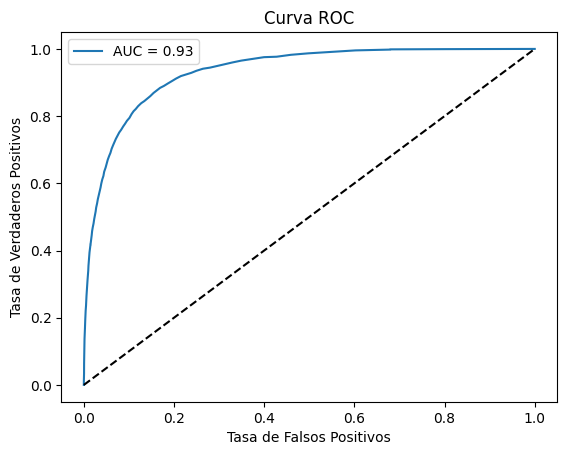


Evaluación Árbol de Decisión:
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16017
           1       0.78      0.77      0.78      4566

    accuracy                           0.90     20583
   macro avg       0.86      0.86      0.86     20583
weighted avg       0.90      0.90      0.90     20583

Matriz de Confusión:
[[15039   978]
 [ 1032  3534]]
Exactitud: 0.9023465967060196
AUC-ROC: 0.8566986399224149


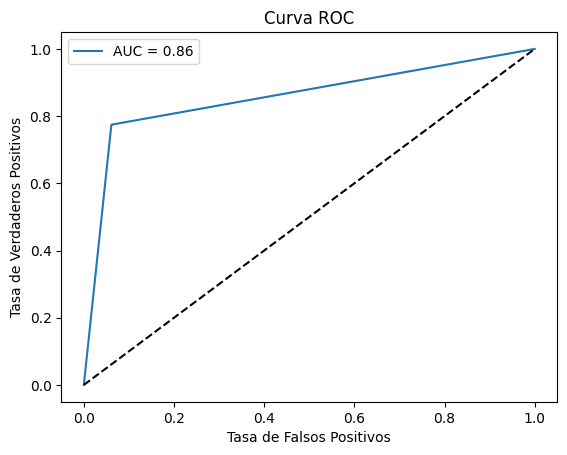


Evaluación Regresión Logística:
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     16017
           1       0.27      0.00      0.01      4566

    accuracy                           0.78     20583
   macro avg       0.52      0.50      0.44     20583
weighted avg       0.67      0.78      0.68     20583

Matriz de Confusión:
[[15974    43]
 [ 4550    16]]
Exactitud: 0.7768546859058446
AUC-ROC: 0.6085180424948733


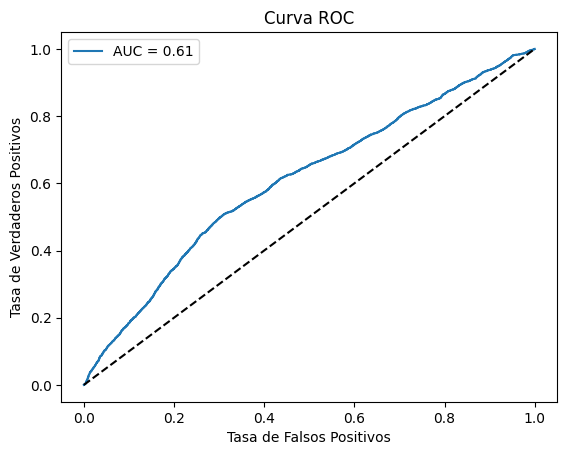

In [31]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    print(f"Exactitud: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

print("Evaluación Random Forest:")
evaluate_model(rf, X_test_scaled, y_test)

print("\nEvaluación Árbol de Decisión:")
evaluate_model(dt, X_test_scaled, y_test)

print("\nEvaluación Regresión Logística:")
evaluate_model(lr, X_test_scaled, y_test)

# ***7. Visualización de Resultados y Métricas***

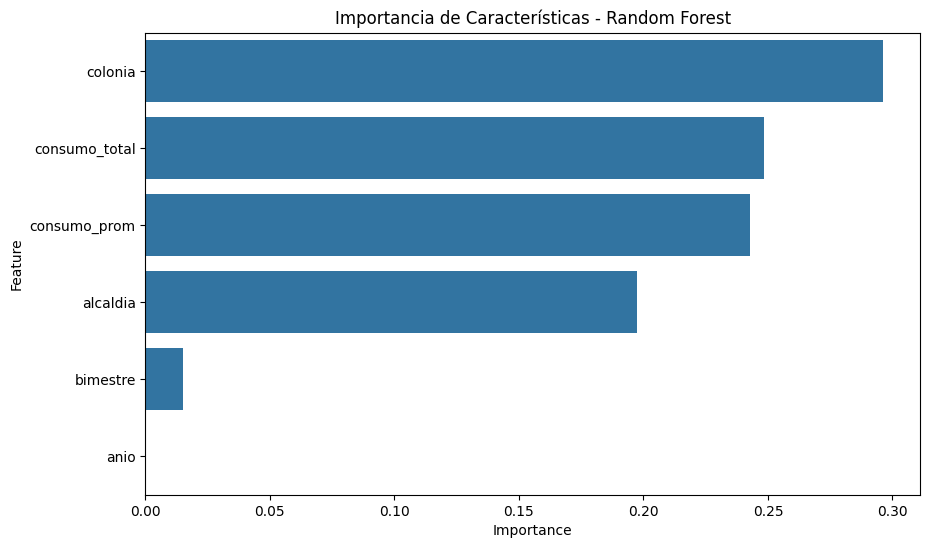

In [32]:
# Importancia de características (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de Características - Random Forest')
plt.show()

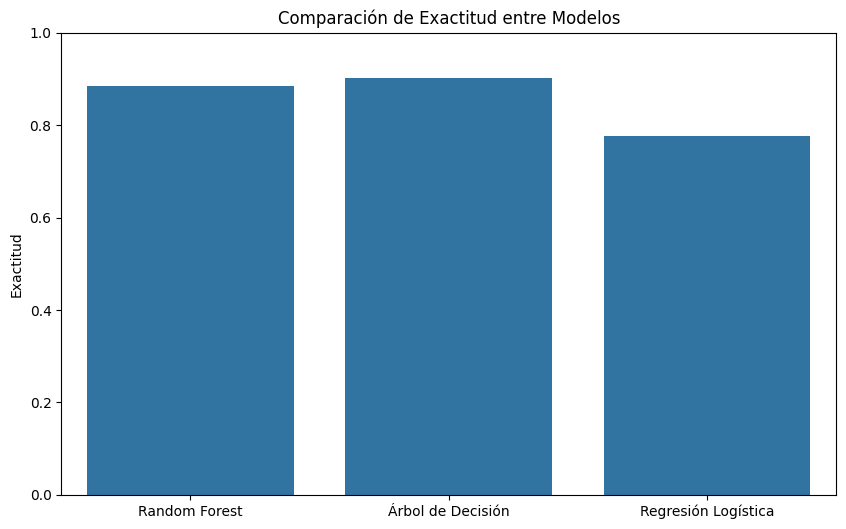

In [33]:
# Comparación de modelos
models = ['Random Forest', 'Árbol de Decisión', 'Regresión Logística']
accuracies = [
    accuracy_score(y_test, rf.predict(X_test_scaled)),
    accuracy_score(y_test, dt.predict(X_test_scaled)),
    accuracy_score(y_test, lr.predict(X_test_scaled))
]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies)
plt.title('Comparación de Exactitud entre Modelos')
plt.ylabel('Exactitud')
plt.ylim(0, 1)
plt.show()